# Gaussian Processes

In this exercise, you will implement Gaussian process regression and apply it to a toy and a real dataset. We use the notation used in the paper "Rasmussen (2005). Gaussian Processes in Machine Learning" linked on ISIS.

Let us first draw a training set $X = (x_1,\dots,x_n)$ and a test set $X_\star = (x^\star_1,\dots,x^\star_m)$ from a $d$-dimensional input distribution. The Gaussian Process is a model under which the real-valued outputs $\mathbf{f} = (f_1,\dots,f_n)$ and $\mathbf{f}_\star = (f^\star_1,\dots,f^\star_m)$ associated to $X$ and $X_\star$ follow the Gaussian distribution:

\begin{equation*}
\left[
\begin{array}{c}\mathbf{f}\\
\mathbf{f}_\star\end{array}
\right]
\sim
\mathcal{N}
\left(
\left[
\begin{array}{c}
\boldsymbol{0}\\
\boldsymbol{0}
\end{array}
\right]
,
\left[
\begin{array}{cc}
\Sigma & \Sigma_\star\\
\Sigma_\star^\top & \Sigma_{\star\star}
\end{array}
\right]
\right)
\end{equation*}

where

\begin{align*}
\Sigma &= k(X,X)+\sigma^2 I\\
\Sigma_\star &= k(X,X_\star)\\
\Sigma_{\star\star} &= k(X_\star,X_\star)+\sigma^2 I
\end{align*}

and where $k(\cdot,\cdot)$ is the Gaussian kernel function. (The kernel function is implemented in `utils.py`.) Predicting the output for new data points $X_\star$ is achieved by conditioning the joint probability distribution on the training set. Such conditional distribution can be expressed as:

\begin{equation}
\mathbf{f}_\star | \mathbf{f} \sim \mathcal{N} (
\underbrace{\Sigma_\star^\top \Sigma^{-1} \mathbf{f}}_{\boldsymbol{\mu}_\star}
~,~
\underbrace{\Sigma_{\star\star} - \Sigma_\star^\top \Sigma^{-1} \Sigma_\star}_{C_\star}
)
\end{equation}

The log-likelihood of observing for the test inputs $X_\star$ the outputs $\mathbf{y}_\star$ is given by evaluating the distribution $\mathbf{f}_\star | \mathbf{f}$ at $\mathbf{y}_\star$:

\begin{equation}
\log p(\mathbf{y}_\star | \mathbf{f}) = -\frac1{2} (\mathbf{y}_\star - \boldsymbol{\mu}_\star)^\top C^{-1}_\star (\mathbf{y}_\star - \boldsymbol{\mu}_\star) - \frac1{2}\log|C_\star| - \frac{m}{2}\log2\pi
\end{equation}

where $|\cdot|$ is the determinant. Similarly, the log-likelihood of observing for the training data $X$ the outputs $\mathbf{y}$ can be measured by evaluating the distribution $\mathbf{f}$ at $\mathbf{y}$:

\begin{equation}
\log p(\mathbf{y}) = -\frac1{2}\mathbf{y}^\top\Sigma^{-1}\mathbf{y} - \frac1{2}\log|\Sigma| - \frac{n}{2}\log2\pi
\end{equation}

## Part 1: Implementing a Gaussian Process (35 P)

**Tasks:**

* **Create a class `GP_Regressor` that implements a Gaussian process regressor and has the following three methods:**

 * **`def __init__(self,Xtrain,Ytrain,noise,width):`** Initialize a Gaussian process with noise parameter $\sigma$ and width parameter $w$. The function must also precompute the matrix $\Sigma^{-1}$ for subsequent use by the method `predict()` and `loglikelihood()`.

 * **`def predict(self,Xtest):`** For the test set $X_\star$ of $m$ points received as parameter, return the mean vector of size $m$ and covariance matrix of size $m \times m$ of the corresponding output, that is, return the parameters $(\boldsymbol{\mu}_\star,C_\star)$ of the Gaussian distribution $\mathbf{f}_\star | \mathbf{f}$.

 * **`def loglikelihood(self,Xtest,Ytest):`** For a data set $X_\star$ of $m$ test points received as first parameter, return the loglikelihood of observing the outputs $\mathbf{y}_\star$ received as second parameter.


* **Test your implementation by running the code below (it visualizes the mean and variance of the prediction at every location of the input space) and compares the behavior of the Gaussian process for various noise parameters $\sigma$ and width parameters $w$.**

Noise : 0.1

Initial w: [ 0.1]
Initial ll [[-16.15815315]]
  status: 0
 success: True
    njev: 8
    nfev: 45
     fun: array([[ 10.04126018]])
       x: array([ 0.33462707,  0.10111324])
 message: 'Optimization terminated successfully.'
     jac: array([-0.00093377,  0.01846826,  0.        ])
     nit: 8
Updated w: [ 0.33462707]
Updated noise: 0.101113239867
Updated ll [[-10.04126018]]



TypeError: float argument required, not numpy.ndarray

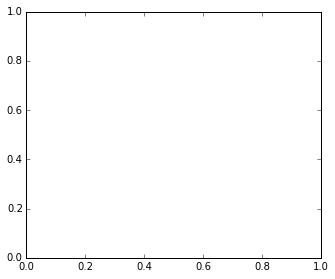

In [1]:
import covariance_functions as utils
import datasets,numpy
from gaussian_process import GP_Regressor
import matplotlib.pyplot as plt
%matplotlib inline


# Open the toy data
Xtrain,Ytrain,Xtest,Ytest = utils.split(*datasets.toy())
#Ytrain = Ytrain[:,numpy.newaxis]
# Create an analysis distribution
Xrange = numpy.arange(-3.5,3.51,0.025)[:,numpy.newaxis]

f = plt.figure(figsize=(18,15))


# Loop over several parameters:
for i,noise in enumerate([0.1, 0.5, 2.5]):
    print 'Noise :', noise
    print ''
    for j,width in enumerate([0.1,0.5,2.5]):
        # Initialize a GP Regressor
        width = numpy.array([width])
        gp = GP_Regressor(1, noise, utils.gaussian_kernel, utils.gaussian_kernel_gradient, width)
        
        gp.update(Xtrain,Ytrain[:,numpy.newaxis])
        
        # Compute the predicted mean and variance for test data
        mean,cov = gp.predict(Xrange)
        var = cov.diagonal()[:,numpy.newaxis]
        
        # Compute the log-likelihood of training and test data
        #lltrain = gp.logtrain()
        lltrain  = gp.logtrain()
        print 'Initial w:', gp.cov_hyperparams
        print 'Initial ll', lltrain
        lltest = gp.loglikelihood(Xtest, Ytest)
        gp.update_hyperparams_ml()
        print 'Updated w:', gp.cov_hyperparams
        print 'Updated noise:', gp.noise
        lltrain2  = gp.logtrain()
        print 'Updated ll', lltrain2
        print ''
        lltest2  = gp.loglikelihood(Xtest ,Ytest)
        mean2,cov2 = gp.predict(Xrange)
        var2 = cov2.diagonal()[:,numpy.newaxis]
        
        toy_line = datasets.toy_func(Xrange)

        # Plot the data
        p = f.add_subplot(3,3,3*i+j+1)
        p.set_title('noise=%.1f width=%.1f lltest=%.1f, lltest2=%.1f'%(noise,width,lltest,lltest2))
        p.set_xlabel('x')
        p.set_ylabel('y')
        p.scatter(Xtrain,Ytrain,color='green',marker='x') # training data
        p.scatter(Xtest,Ytest,color='green',marker='o')   # test data
        p.plot(Xrange,mean,color='blue')                  # GP mean
        p.plot(Xrange,mean+var**.5,color='red')           # GP mean + std
        p.plot(Xrange,mean-var**.5,color='red')           # GP mean - std
        p.plot(Xrange,mean2,color='green')
        p.plot(Xrange,toy_line,color='black')  # GP mean
        p.plot(Xrange,mean2+var2**.5,color='orange')           # GP mean + std
        p.plot(Xrange,mean2-var2**.5,color='orange')           # GP mean - std
        p.set_xlim(-3.5,3.5)
        p.set_ylim(-4,4)

        

##Part 2: Application to the Yacht Hydrodynamics Data Set (15 P)

In the second part, we would like to apply the Gaussian process regressor that you have implemented to a real dataset: the Yacht Hydrodynamics Data Set available on the UCI repository at the webpage http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics. As stated on the web page, the input variables for this regression problem are:

1. Longitudinal position of the center of buoyancy
2. Prismatic coefficient
3. Length-displacement ratio
4. Beam-draught ratio
5. Length-beam ratio
6. Froude number

and we would like to predict from these variables the residuary resistance per unit weight of displacement (last column in the file `yacht_hydrodynamics.data`).

**Tasks:**

* **Load the data using `datasets.yacht()` and partition the data between training and test set using the function `utils.split()`. Normalize the data (center and rescale) so that the training data and labels have mean 0 and standard deviation 1 over the dataset for each dimension.**


* **Train several Gaussian processes on the regression task using various width and noise parameters.**


* **Draw two contour plots where the training and test log-likelihood are plotted as a function of the noise and width parameters. Choose suitable ranges of parameters so that the best parameter combination for the test set is in the plot. Use the same ranges and contour levels for training and test plots.**

In [2]:
import covariance_functions as utils, datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

Xtrain,Ytrain,Xtest,Ytest = utils.split(*datasets.yacht())
print Xtrain.shape
xmean = np.mean(Xtrain,axis=0)
xstd = np.std(Xtrain,axis=0)
ymean = np.mean(Ytrain)
ystd = np.std(Ytrain)

Xtrain = (Xtrain-xmean)/xstd
Xtest = (Xtest-xmean)/xstd
Ytrain = (Ytrain-ymean)/ystd
Ytest = (Ytest-ymean)/ystd


print 'Xtrain.mean():', np.mean(Xtrain,axis=0)
print 'Xtest.mean(): ', np.mean(Xtest,axis=0)
print 'Xtrain.std():', np.std(Xtrain,axis=0)
print 'Xtest.std(): ', np.std(Xtest,axis=0)
print 'Ytrain.mean(): {: 0.3f}'.format(np.mean(Ytrain,axis=0))
print 'Ytest.mean():  {: 0.3f}'.format(np.mean(Ytest,axis=0))
print 'Ytrain.std(): {: 0.3f}'.format(np.std(Ytrain,axis=0))
print 'Ytest.std():  {: 0.3f}'.format(np.std(Ytest,axis=0))

lltrain = np.zeros((12,12))
lltest = np.zeros((12,12))

noise_par = np.linspace(0.005,0.02,12)
#noise_par = np.linspace(0.3,1,12)
width_par = np.linspace(0.75,2,12)
#width_par = np.linspace(0.5,2,12)
print 'Noise params:', noise_par
print 'Width params:', width_par

#for i,noise in enumerate(noise_par):
#    for j, width in enumerate(width_par):
#        gp = GP_Regressor(6, noise, utils.gaussian_kernel, utils.gaussian_kernel_gradient, width)
#        gp.update(Xtrain, Ytrain)
#        lltrain[i,j] = gp.loglikelihood(Xtrain,Ytrain)
#        lltest[i,j] = gp.loglikelihood(Xtest,Ytest)
        
        
print np.max(lltrain)
print np.max(lltest)
print "optimal params"
gp = GP_Regressor(6, 0.02, utils.gaussian_kernel, utils.gaussian_kernel_gradient, 1)
gp.update(Xtrain, Ytrain)
gp.update_hyperparams_ml()
print 'Optimal width:', gp.cov_hyperparams
print 'Optimal noise:', gp.noise
lltrain2 = gp.loglikelihood(Xtrain,Ytrain)
lltest2 = gp.loglikelihood(Xtest,Ytest)
print lltrain2
print lltest2
        

        

(153, 6)
Xtrain.mean(): [ 0.000  0.000  0.000 -0.000  0.000 -0.000]
Xtest.mean():  [-0.075 -0.177 -0.059 -0.031 -0.091 -0.001]
Xtrain.std(): [ 1.000  1.000  1.000  1.000  1.000  1.000]
Xtest.std():  [ 1.096  1.086  0.897  0.939  0.950  1.024]
Ytrain.mean(): -0.000
Ytest.mean():   0.070
Ytrain.std():  1.000
Ytest.std():   1.091
Noise params: [ 0.005  0.006  0.008  0.009  0.010  0.012  0.013  0.015  0.016  0.017
  0.019  0.020]
Width params: [ 0.750  0.864  0.977  1.091  1.205  1.318  1.432  1.545  1.659  1.773
  1.886  2.000]
0.0
0.0
optimal params
  status: 0
 success: True
    njev: 11
    nfev: 57
     fun: array([[ 95.846]])
       x: array([ 1.671,  0.174])
 message: 'Optimization terminated successfully.'
     jac: array([-0.002,  0.001,  0.000])
     nit: 11
Optimal width: [ 1.671]
Optimal noise: 0.173984822854
[[ 69.024]]
[[ 14.961]]


<a list of 75 text.Text objects>

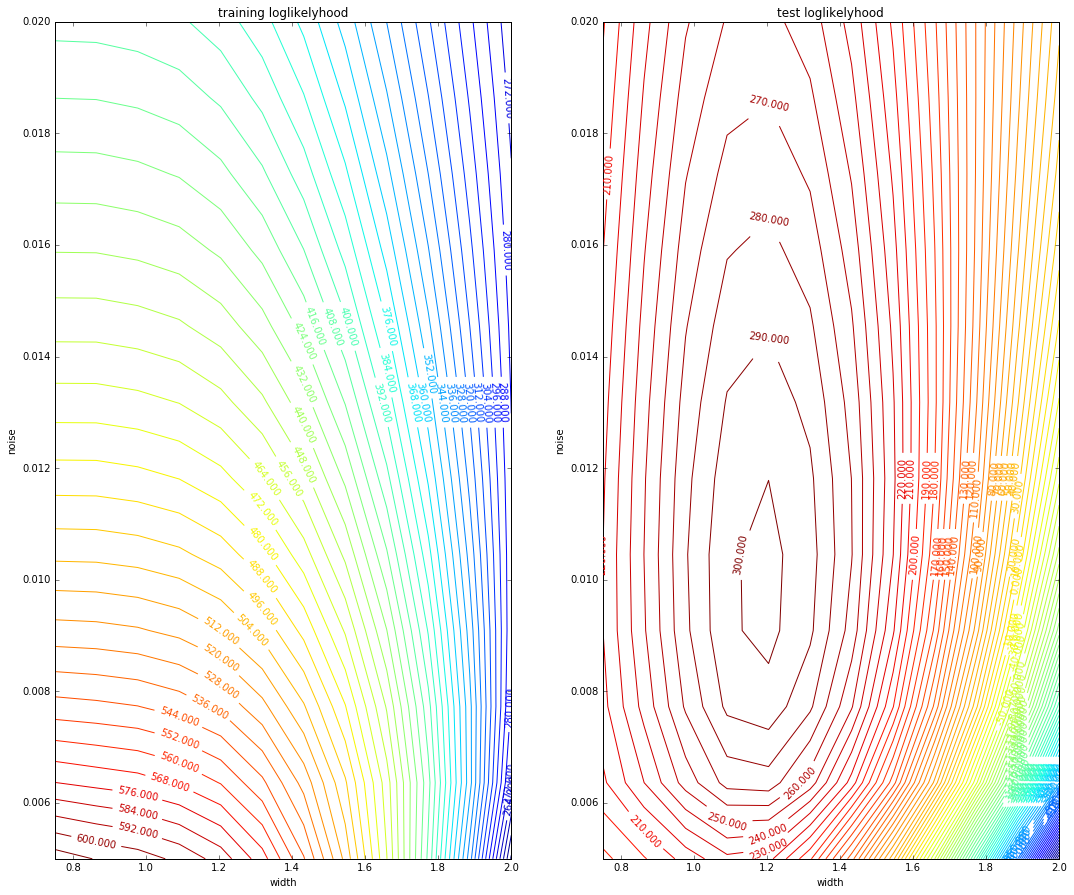

In [5]:

f = plt.figure(figsize=(18,15))
p = f.add_subplot(1,2,1)
p.set_title('training loglikelyhood')
p.set_xlabel('width')
p.set_ylabel('noise')
cs = p.contour(width_par,noise_par, lltrain,50)
plt.clabel(cs,inline=1)
p = f.add_subplot(1,2,2)
p.set_title('test loglikelyhood')
p.set_xlabel('width')
p.set_ylabel('noise')
cs = p.contour(width_par,noise_par, lltest,100)
plt.clabel(cs,inline=1)

## Submission

Export the notebook to PDF format by running the following command:

`ipython nbconvert --to latex --post pdf sheet12_YourGroupName.ipynb`

Read the output file (`sheet12_YourGroupName.pdf`) one more time and make sure that all your code, answers and results are included before submitting.

Note that your submission should only contain the relevant printouts and plots and the size of the submission should be reasonable (e.g. more than 30 pages would be too large).